In [1]:
from os.path import join, expanduser

from matplotlib.pyplot import scatter, xlabel, ylabel, ylim, xlim, plot
from numpy import sqrt
from pandas import DataFrame, read_excel
from sklearn.linear_model import LinearRegression

In [2]:
io: str = join(expanduser('~'), "Documents", "Data_Emigrant Study and APA.xlsx")

outcome: DataFrame    = read_excel(io=io, sheet_name='HSCL-25', header=0, index_col=0, usecols="A,KS", skiprows=[1])
y: DataFrame = outcome

predictors: DataFrame = read_excel(io=io,
                                   sheet_name='Harvard Trauma Questionairre',
                                   header=0,
                                   index_col=0,
                                   usecols="A, B",
                                   skiprows=[1])
X: DataFrame = predictors

X: DataFrame = X.dropna(axis="rows", how="any")
y: DataFrame = y.dropna(axis="rows", how="any")


# Проверка на gooдубликаты, важно!
print(X[X.index.duplicated(keep=False)])
print(y[y.index.duplicated(keep=False)])
y: DataFrame = y[y.index.isin(X.index)]
X: DataFrame = X[X.index.isin(y.index)]

Empty DataFrame
Columns: [Какому количеству травм они подверглись]
Index: []
Empty DataFrame
Columns: [DSM IV]
Index: []


(0.0, 12.0)

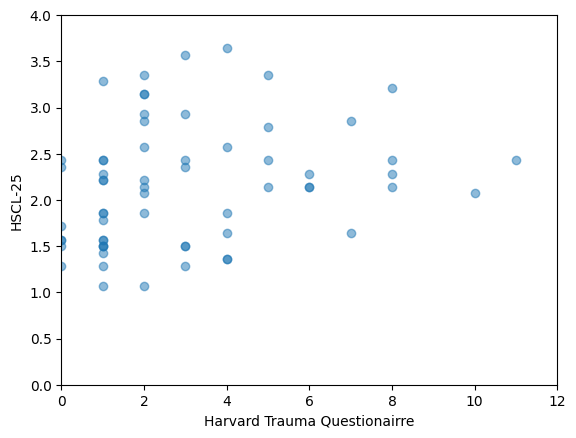

In [3]:
scatter(x=X, y=y, alpha=0.5)
xlabel("Harvard Trauma Questionairre")
ylabel("HSCL-25")
ylim(0, 4)
xlim(0, 12)

In [4]:
model = LinearRegression()
model.fit(X=X, y=y)

LinearRegression()

In [5]:
print(model.coef_)
print(model.intercept_)

[[0.06340105]]
[1.96739323]


(-1.0, 12.0)

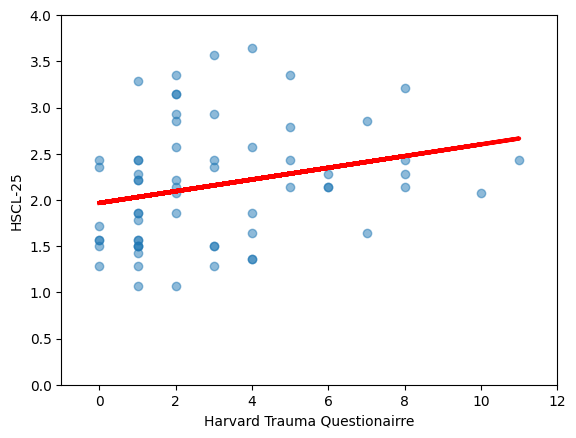

In [6]:
scatter(x=X, y=y, alpha=0.5)
plot(X, model.predict(X), color="red", linewidth=3)
xlabel("Harvard Trauma Questionairre")
ylabel("HSCL-25")
ylim(0, 4)
xlim(-1, 12)

In [7]:
%precision %.2f
model.score(X=X, y=y) # R^2

0.07

In [8]:
se = sqrt(42/63 * (1 - 42/63)/63)
se

0.06

In [9]:
print(42/63 - 1.96 * se, 42/63 + 1.96 * se)
print(1, 1.96 * se)

0.5502595479670329 0.7830737853663003
1 0.11640711869963373
